## CPSC 340 Lecture 19 demo

SVM and logistic regression


In [21]:
import numpy as np
import numpy.random as npr
import sklearn
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline

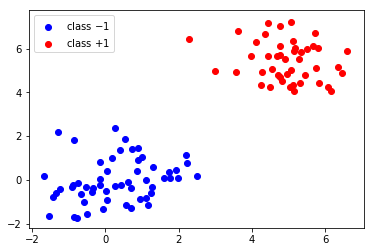

In [22]:
# make up some fake data

N = 100
X = npr.randn(N,2)
y = npr.choice((-1,+1),size=N)
X[y>0] += 5

plt.scatter(X[y<0,0], X[y<0,1], color="b", label="class $-1$")
plt.scatter(X[y>0,0], X[y>0,1], color="r", label="class $+1$")
plt.legend(loc="best")
plt.show()

In [23]:
def plotClassifier(model, X, y):
    x1 = X[:, 0]
    x2 = X[:, 1]
    
    x1_min, x1_max = int(x1.min()) - 1, int(x1.max()) + 1
    x2_min, x2_max = int(x2.min()) - 1, int(x2.max()) + 1

    x1_line =  np.linspace(x1_min, x1_max,200)
    x2_line =  np.linspace(x2_min, x2_max,200)

    x1_mesh, x2_mesh = np.meshgrid(x1_line, x2_line)

    mesh_data = np.c_[x1_mesh.ravel(), x2_mesh.ravel()]

    y_pred = model.predict(mesh_data)
    y_pred = np.reshape(y_pred, x1_mesh.shape)

    plt.xlim([x1_mesh.min(), x1_mesh.max()])
    plt.ylim([x2_mesh.min(), x2_mesh.max()])

    plt.contourf(x1_mesh, x2_mesh, -y_pred, cmap=plt.cm.RdBu, label="decision boundary", alpha=0.6)

    plt.scatter(x1[y<0], x2[y<0], color="b", label="class $-1$")
    plt.scatter(x1[y>0], x2[y>0], color="r", label="class $+1$")
    plt.legend(loc="best")

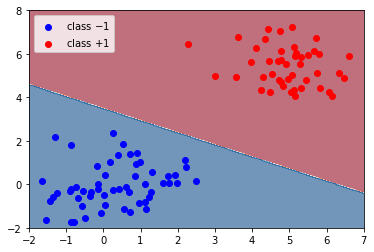

In [24]:
lr = LogisticRegression()
lr.fit(X,y)
plotClassifier(lr,X,y)

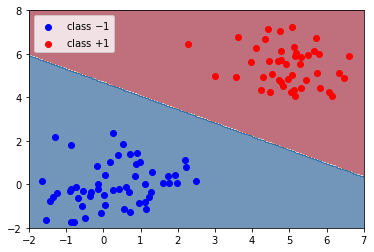

In [25]:
svm = SVC(kernel="linear")
svm.fit(X,y)
plotClassifier(svm, X, y)

We can see that the SVM "maximizes the margin".

We can also play with the hyperparameters with the RBF kernel. To see this in action we make some data that isn't separable.

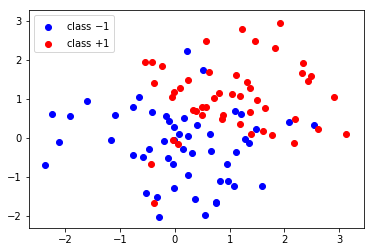

In [26]:
N = 100
X = npr.randn(N,2)
y = npr.choice((-1,+1),size=N)
X[y>0] += 1

plt.scatter(X[y<0,0], X[y<0,1], color="b", label="class $-1$")
plt.scatter(X[y>0,0], X[y>0,1], color="r", label="class $+1$")
plt.legend(loc="best")
plt.show()

- Larger `gamma` leads to more complex boundaries. 
- Larger `C` means more regularization.

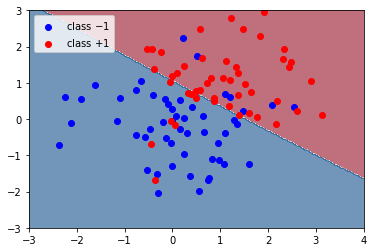

In [42]:
svm = SVC(kernel="rbf", gamma=0.01, C=1)
svm.fit(X,y)
plotClassifier(svm, X, y)

You can think of `gamma` as controlling what boundaries are _possible_ whereas `C` controls how much of that complexity we really want to invoke.